<a href="https://colab.research.google.com/github/beertocode/facerecognition/blob/master/facerecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install face_recognition

     |████████████████████████████████| 100.2MB 55kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=746eb668e49425e06fb9be4b416669ad2b71b73c981fccb5017ccff612542c4b
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [5]:
mkdir unknown

In [6]:
ls unknown

1.jpg  2.jpg  3.jpg  4.jpg


In [7]:
ls known

bill.jpg  elon.jpg  obama.jpg


In [8]:
import face_recognition
import cv2
import os
from google.colab.patches import cv2_imshow

In [9]:
#function to read and resize all images acc to ratio
def read_img(path):
  img=cv2.imread(path)
  (h, w)=img.shape[:2]
  width=500
  ratio=width/float(w)
  height=int(h*ratio)
  return cv2.resize(img,(width,height))

known_encodings=[]
known_names=[]
known_dir='known'

for file in os.listdir(known_dir):
  img=read_img(known_dir+'/'+file)
  #since we have only 1 face in a image we use onlt ine list element indexed 0
  img_enc=face_recognition.face_encodings(img)[0]
  known_encodings.append(img_enc)
  known_names.append(file.split('.')[0])

known_encodings


[array([-0.0523693 ,  0.09179692, -0.00468793,  0.02141163, -0.19504517,
        -0.02934279, -0.0796966 , -0.14625743,  0.11711887, -0.08426893,
         0.13177979, -0.03378345, -0.18301614,  0.00876677, -0.02259477,
         0.07762438, -0.20221826, -0.06868957, -0.08593205, -0.09531841,
        -0.01733385,  0.02710225,  0.06231398, -0.00476122, -0.14727694,
        -0.20751446, -0.12234352, -0.11050497,  0.15899628, -0.09022158,
         0.02133489,  0.08001615, -0.19436991, -0.07705434,  0.04400419,
         0.16742161, -0.0686079 , -0.05245495,  0.19684374,  0.00940581,
        -0.15506543,  0.03573705,  0.08374632,  0.20605454,  0.2494404 ,
         0.02933653, -0.01707627, -0.03239734,  0.13480094, -0.22699113,
         0.08788815,  0.16995896,  0.19119251,  0.1025674 ,  0.06246078,
        -0.18752033,  0.06989313,  0.20451632, -0.15381092,  0.08547963,
         0.13881078, -0.10484061,  0.03998166,  0.06027485,  0.16159916,
         0.11506579, -0.01704665, -0.13490899,  0.1

In [15]:
unknown_dir='unknown'
for file in os.listdir(unknown_dir):
  print("Processing",file)
  img=read_img(unknown_dir+'/'+file)
  img_enc=face_recognition.face_encodings(img)[0]
  #comparing unknown faces with known encodings
  #comapre faces takes known encodings and compare with unknown encodings 
  #and return a boolean array which is true if any of the unknown encodings matches with the known encodings
  results=face_recognition.compare_faces(known_encodings,img_enc)
  #to know whose image is matched we will use known names array
  for i in range (len(results)):
    if results[i]:
      print(known_names[i])
    
  #print(results)


Processing 1.jpg
bill
Processing 4.jpg
Processing 3.jpg
obama
Processing 2.jpg
elon


In [16]:
#face distances method gives actual distance between the images
for file in os.listdir(unknown_dir):
  print("Processing",file)
  img=read_img(unknown_dir+'/'+file)
  img_enc=face_recognition.face_encodings(img)[0]
  #comparing unknown faces with known encodings
  #comapre faces takes known encodings and compare with unknown encodings 
  #and return a boolean array which is true if any of the unknown encodings matches with the known encodings
  results=face_recognition.compare_faces(known_encodings,img_enc)
  #to know whose image is more matched i.e at less distance
  print(face_recognition.face_distance(known_encodings,img_enc))

Processing 1.jpg
[0.         0.81711952 0.7218668 ]
Processing 4.jpg
[0.81003987 0.82983834 0.77527655]
Processing 3.jpg
[0.81711952 0.         0.78236783]
Processing 2.jpg
[0.7218668  0.78236783 0.        ]


Processing 1.jpg


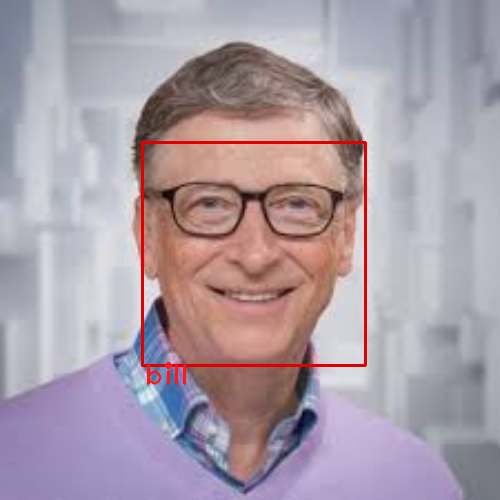

Processing 4.jpg
Processing 3.jpg


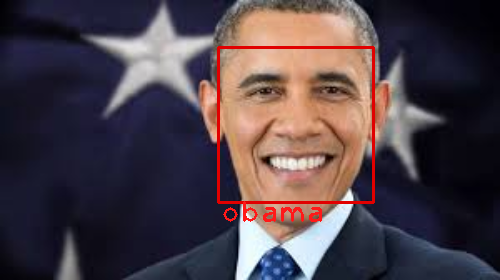

Processing 2.jpg


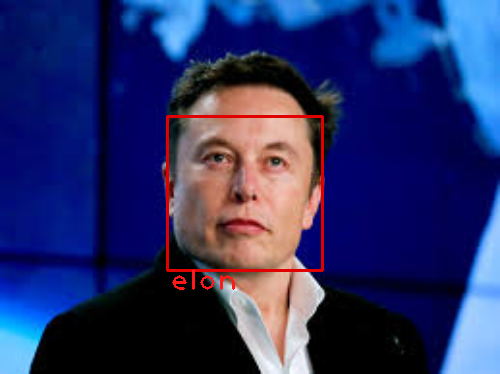

In [24]:
#using open cv  to draw on top of new image and write the name
for file in os.listdir(unknown_dir):
  print("Processing",file)
  img=read_img(unknown_dir+'/'+file)
  img_enc=face_recognition.face_encodings(img)[0]
  results=face_recognition.compare_faces(known_encodings,img_enc)
  #to know whose image is matched we will use known names array
  for i in range (len(results)):
    if results[i]:
      name=known_names[i]
      #face_locations returns coordinates of bounding box of each
      #face in the image
      (top,right,bottom,left)=face_recognition.face_locations(img)[0]
      #using these coordinates we draw a bounding box using cv2.rectangle
      cv2.rectangle(img,(left,top),(right,bottom),(0,0,225),2)
      #writing name on box
      cv2.putText(img,name,(left+2,bottom+20),cv2.FONT_HERSHEY_PLAIN,2,(25,25,255),2)
      cv2_imshow(img)  #for google colab